<a href="https://colab.research.google.com/github/guilhermelaviola/MovieRatingAnalysis/blob/main/IMDbWatchlistStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


# **Basic information of the dataset**

In [8]:
# Importing the dataset and displying the last 10 rows:
imdb = pd.ExcelFile('IMDb.xlsx')
wl = pd.read_excel(imdb, 'Watchlist')
wl.tail(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
733,2024-06-07,Michael Collins,Movie,7.1,133,1996,"Biography, Drama, Thriller, War",33896,1996-10-25 00:00:00,Neil Jordan
734,2024-06-09,Midnight in the Garden of Good and Evil,Movie,6.6,155,1997,"Crime, Drama, Mystery, Thriller",41605,1997-11-21 00:00:00,Clint Eastwood
735,2024-06-11,Hart's War,Movie,6.3,125,2002,"Drama, War",55532,2002-02-15 00:00:00,Gregory Hoblit
736,2024-06-12,Good Burger 2,Movie,5.3,90,2023,"Comedy, Family",3694,2023-11-22 00:00:00,Phil Traill
737,2024-06-12,Class of 1984,Movie,6.5,98,1982,"Action, Crime, Drama, Thriller",13350,1982-08-20 00:00:00,Mark L. Lester
738,2024-06-13,Figures in a Landscape,Movie,6.5,110,1970,"Action, Thriller",1706,1971-03-22 00:00:00,Joseph Losey
739,2024-06-14,The Incredible Journey,Movie,7.0,80,1963,"Adventure, Drama, Family",5257,1963-11-20 00:00:00,Fletcher Markle
740,2024-06-14,Blue Thunder,Movie,6.4,109,1983,"Action, Crime, Drama, Thriller",23454,1983-05-13 00:00:00,John Badham
741,2024-06-15,Sahara,TV Movie,6.7,106,1995,"Action, War",3590,1995-04-25 00:00:00,Brian Trenchard-Smith
742,2024-06-15,Rescue Dawn,Movie,7.3,125,2006,"Adventure, Biography, War",111139,2007-07-27 00:00:00,Werner Herzog


In [9]:
# Displaying the number of rows and columns in the dataset:
wl.shape

(743, 10)

In [10]:
# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         743 non-null    datetime64[ns]
 1   Title           743 non-null    object        
 2   Title Type      743 non-null    object        
 3   IMDb Rating     743 non-null    float64       
 4   Runtime (mins)  743 non-null    int64         
 5   Year            743 non-null    int64         
 6   Genres          743 non-null    object        
 7   Num Votes       743 non-null    int64         
 8   Release Date    743 non-null    object        
 9   Directors       739 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 58.2+ KB


In [11]:
# Displaying statistical data of the numerical data present in the dataset:
wl.describe()

,Created,IMDb Rating,Runtime (mins),Year,Num Votes
count,743,743.000000,743.00000,743.000000,7.430000e+02
mean,2022-08-02 19:51:55.477792768,6.649529,114.10498,1989.936743,8.168690e+04
min,2020-04-29 00:00:00,0.000000,71.00000,1927.000000,0.000000e+00
25%,2021-11-03 00:00:00,6.200000,100.00000,1981.500000,5.407000e+03
50%,2022-06-19 00:00:00,6.600000,109.00000,1992.000000,2.204800e+04
75%,2023-03-17 00:00:00,7.200000,121.00000,2000.000000,7.380150e+04
max,2024-06-15 00:00:00,9.000000,317.00000,2024.000000,2.871665e+06
std,NaN,0.812086,24.93949,16.066658,2.000350e+05


# **Basic column data plotting**

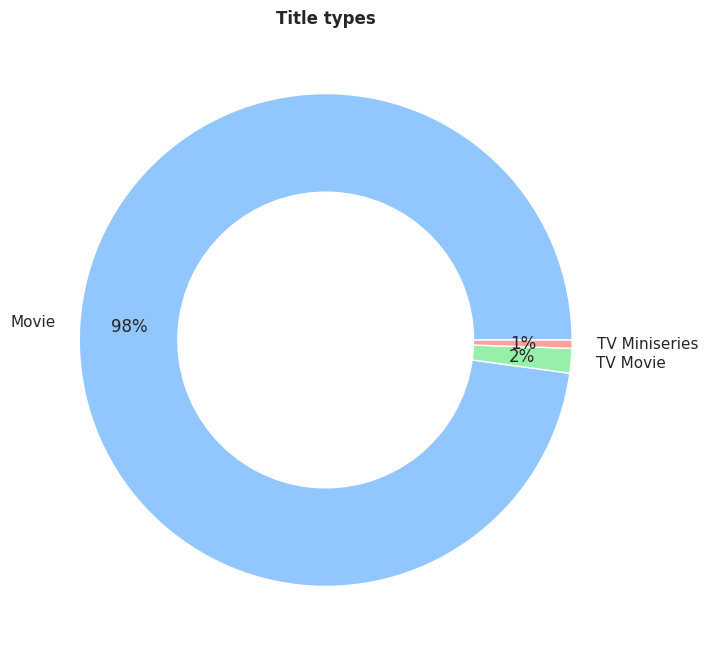

In [12]:
# Displaying the title types present in the dataset:
wl['Title Type'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [13]:
# Creating a datetime object based on the dates from the dataset:
wl['Created'] = wl['Created'].map(pd.to_datetime)
wl['Day Created'] = wl['Created'].apply(lambda x : x.day)
wl['Month Created'] = wl['Created'].apply(lambda x : x.month)
wl['Year Created'] = wl['Created'].apply(lambda x : x.year)
wl['Weekday Created'] = wl['Created'].apply(lambda x : x.weekday())

# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Created          743 non-null    datetime64[ns]
 1   Title            743 non-null    object        
 2   Title Type       743 non-null    object        
 3   IMDb Rating      743 non-null    float64       
 4   Runtime (mins)   743 non-null    int64         
 5   Year             743 non-null    int64         
 6   Genres           743 non-null    object        
 7   Num Votes        743 non-null    int64         
 8   Release Date     743 non-null    object        
 9   Directors        739 non-null    object        
 10  Day Created      743 non-null    int64         
 11  Month Created    743 non-null    int64         
 12  Year Created     743 non-null    int64         
 13  Weekday Created  743 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7)

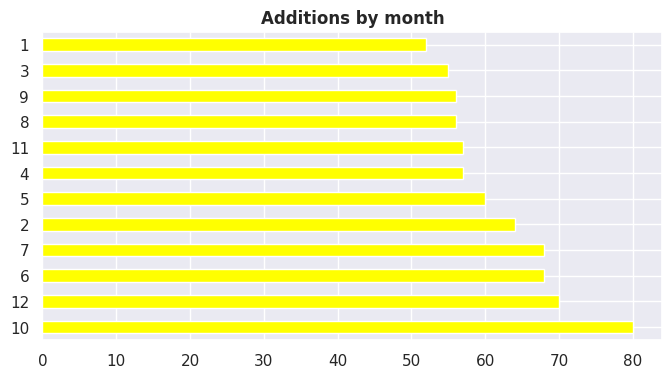

In [14]:
# Displaying the months with most and less additions:
wl['Month Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by month', fontweight = 'bold')
plt.show()

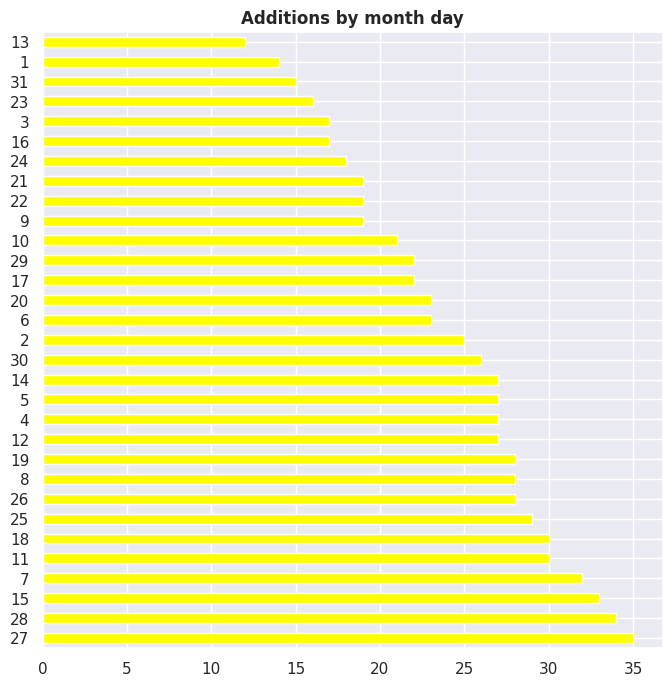

In [15]:
# Displaying the month days with most and less additions:
wl['Day Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Additions by month day', fontweight = 'bold')
plt.show()

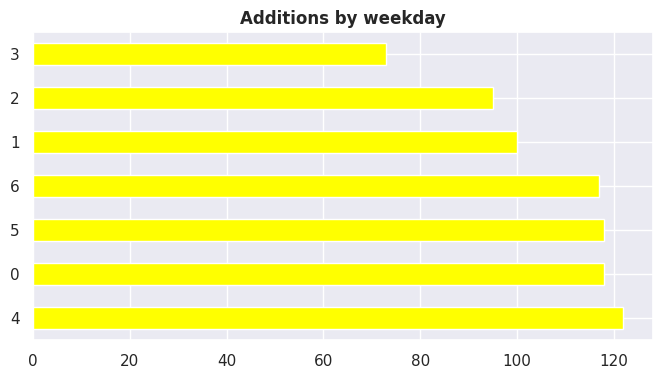

In [16]:
# Displaying the weekdays with most and less additions:
wl['Weekday Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by weekday', fontweight = 'bold')
plt.show()

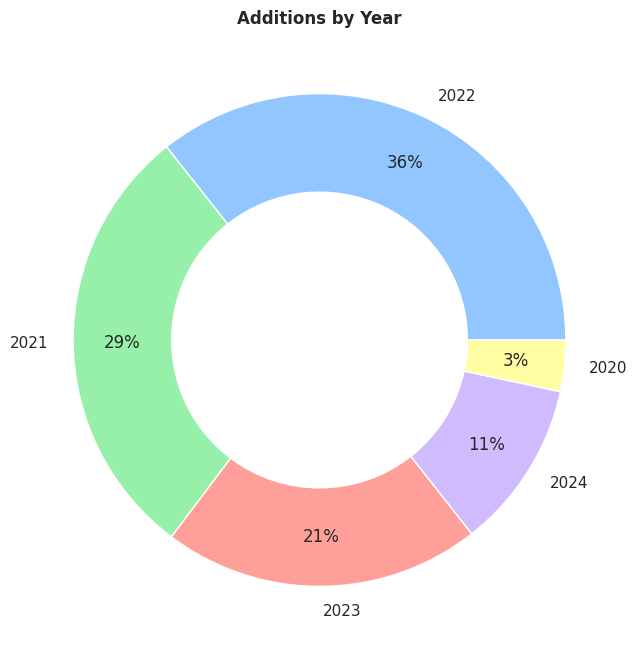

In [17]:
# Displaying the years with most and less additions:
wl['Year Created'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Additions by Year', fontweight = 'bold')
plt.show()

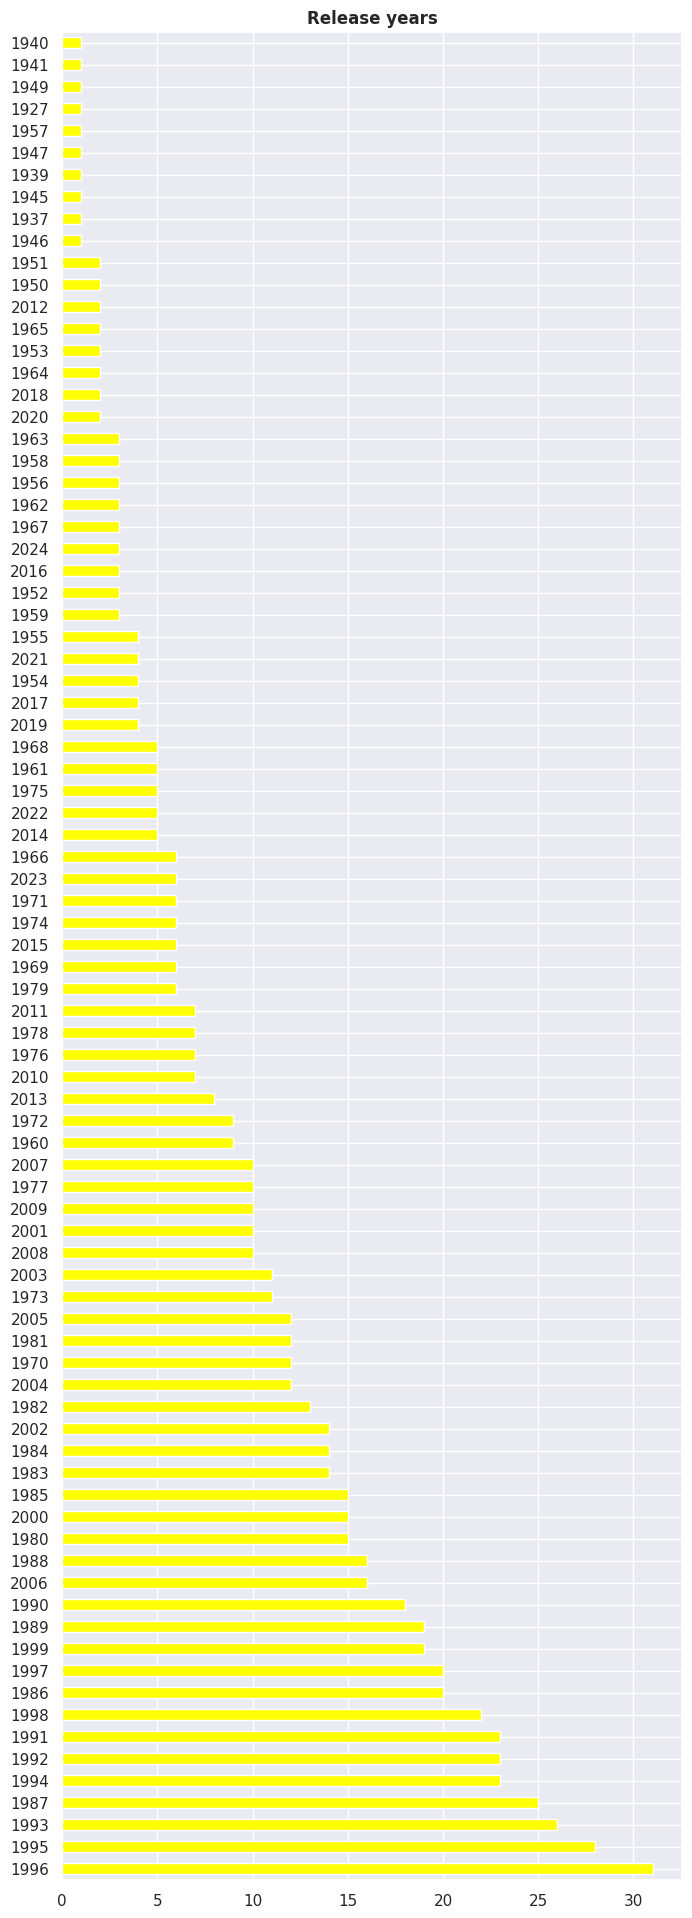

In [18]:
# Displaying distibution of release years in the dataset:
wl['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release years', fontweight = 'bold')
plt.show()

# **Applying functions to combine data from more than one column to generate new columns with analytics**

In [19]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Decade'] = wl['Year'].apply(movies_by_decade)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade
0,2020-04-29,The Great Dictator,Movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,29,4,2020,2,1940s
1,2020-04-29,Vertigo,Movie,8.3,128,1958,"Mystery, Romance, Thriller",427044,1958-05-09 00:00:00,Alfred Hitchcock,29,4,2020,2,1950s
2,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,Movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",386979,2007-12-03 00:00:00,Tim Burton,7,5,2020,3,2000s
3,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s
4,2020-05-11,Alaska,Movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,11,5,2020,0,1990s


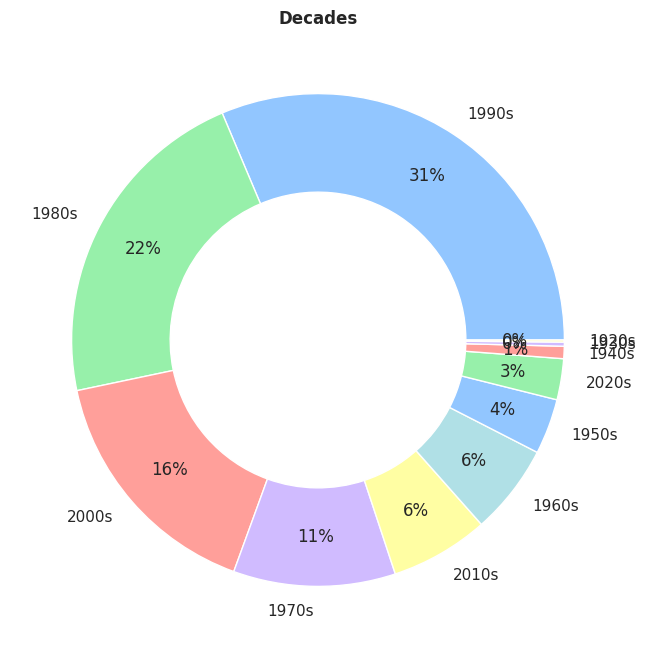

In [21]:
# Displaying the decades the movies are from:
wl['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Decades', fontweight = 'bold')
plt.show()

In [22]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Regular'
  elif rating >= 4 and rating < 5:
    quality = 'Bad'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quality'] = wl['IMDb Rating'].apply(imdb_rating)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality
0,2020-04-29,The Great Dictator,Movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,29,4,2020,2,1940s,Amazing
1,2020-04-29,Vertigo,Movie,8.3,128,1958,"Mystery, Romance, Thriller",427044,1958-05-09 00:00:00,Alfred Hitchcock,29,4,2020,2,1950s,Amazing
2,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,Movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",386979,2007-12-03 00:00:00,Tim Burton,7,5,2020,3,2000s,Good
3,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular
4,2020-05-11,Alaska,Movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,11,5,2020,0,1990s,Regular


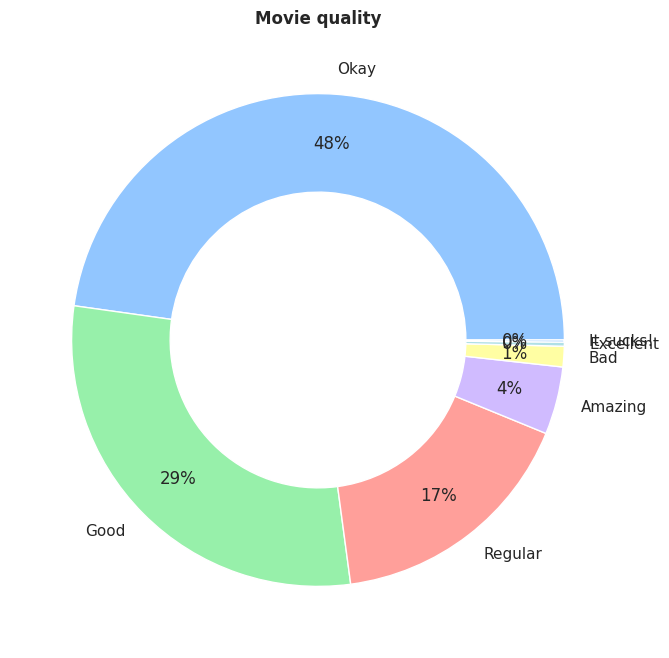

In [23]:
# Displaying the movie rating classification based on the algorithm above:
wl['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [25]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes > 2000000:
    popularity = 'Over 2M votes'
  elif num_votes > 1000000 and num_votes <= 2000000:
    popularity = 'Over 1M votes'
  elif num_votes > 500000 and num_votes <= 1000000:
    popularity = 'Over 500k votes'
  elif num_votes > 250000 and num_votes <= 500000:
    popularity = 'Over 250k votes'
  else:
    popularity = 'Less than 250k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie popularity'] = wl['Num Votes'].apply(movie_popularity)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity
0,2020-04-29,The Great Dictator,Movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,29,4,2020,2,1940s,Amazing,Less than 250k votes
1,2020-04-29,Vertigo,Movie,8.3,128,1958,"Mystery, Romance, Thriller",427044,1958-05-09 00:00:00,Alfred Hitchcock,29,4,2020,2,1950s,Amazing,Over 250k votes
2,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,Movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",386979,2007-12-03 00:00:00,Tim Burton,7,5,2020,3,2000s,Good,Over 250k votes
3,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular,Less than 250k votes
4,2020-05-11,Alaska,Movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,11,5,2020,0,1990s,Regular,Less than 250k votes


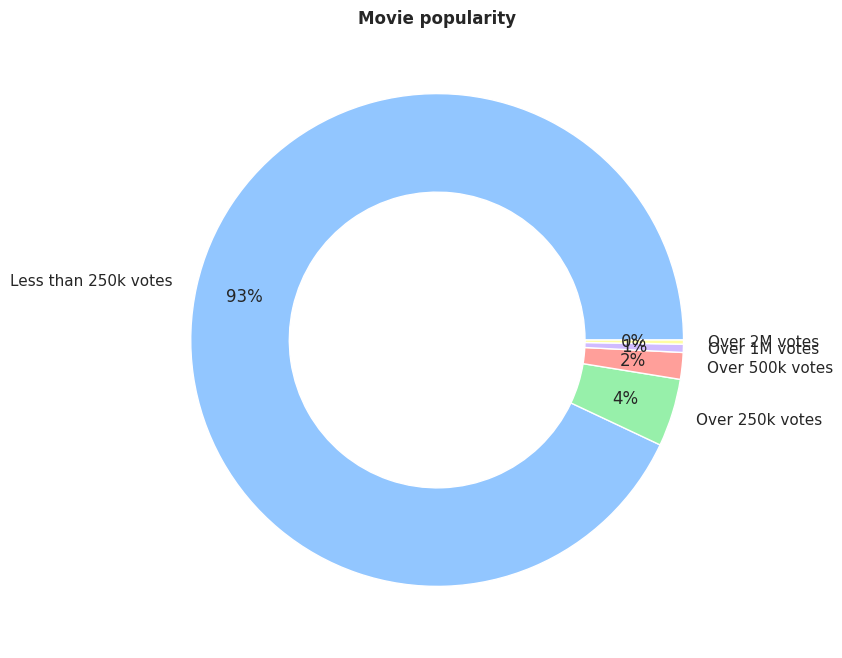

In [26]:
# Displaying the movie popularity based on the algorithm above:
wl['Movie popularity'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [27]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie duration'] = wl['Runtime (mins)'].apply(movie_duration)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration
0,2020-04-29,The Great Dictator,Movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,29,4,2020,2,1940s,Amazing,Less than 250k votes,Between 2h and 2h29
1,2020-04-29,Vertigo,Movie,8.3,128,1958,"Mystery, Romance, Thriller",427044,1958-05-09 00:00:00,Alfred Hitchcock,29,4,2020,2,1950s,Amazing,Over 250k votes,Between 2h and 2h29
2,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,Movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",386979,2007-12-03 00:00:00,Tim Burton,7,5,2020,3,2000s,Good,Over 250k votes,Between 1h40 and 1h59
3,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h30 and 1h39
4,2020-05-11,Alaska,Movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h40 and 1h59


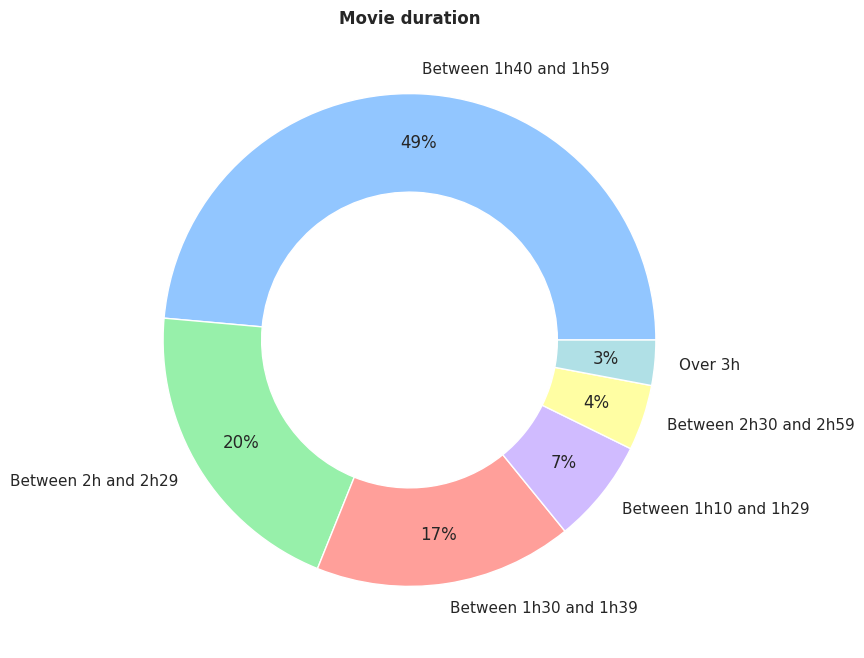

In [28]:
# Displaying the movie duration based on the algorithm above:
wl['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [29]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quartile Added'] = wl['Month Created'].apply(year_quartile)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added
0,2020-04-29,The Great Dictator,Movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,29,4,2020,2,1940s,Amazing,Less than 250k votes,Between 2h and 2h29,Second
1,2020-04-29,Vertigo,Movie,8.3,128,1958,"Mystery, Romance, Thriller",427044,1958-05-09 00:00:00,Alfred Hitchcock,29,4,2020,2,1950s,Amazing,Over 250k votes,Between 2h and 2h29,Second
2,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,Movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",386979,2007-12-03 00:00:00,Tim Burton,7,5,2020,3,2000s,Good,Over 250k votes,Between 1h40 and 1h59,Second
3,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h30 and 1h39,Second
4,2020-05-11,Alaska,Movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h40 and 1h59,Second


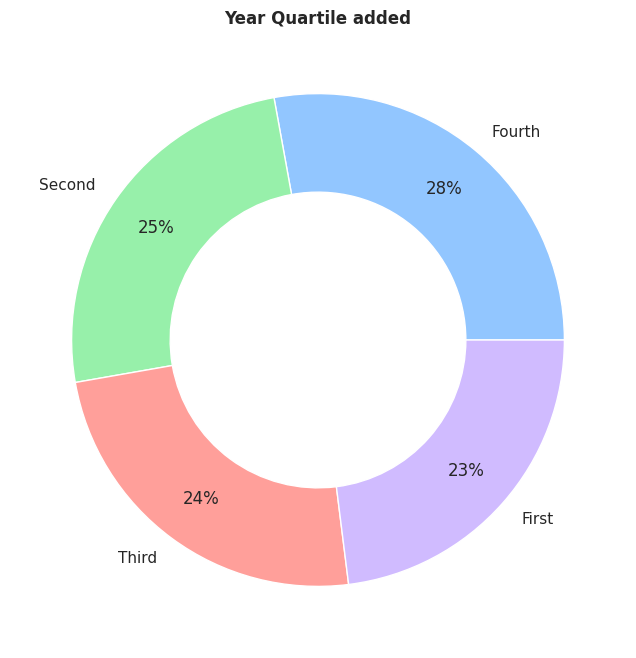

In [30]:
# Displaying the quartile the movie was added based on the algorithm above:
wl['Quartile Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile added', fontweight = 'bold')
plt.show()

In [31]:
# Classifying the movies by the month half added based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Month Half Added'] = wl['Day Created'].apply(month_half)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added,Month Half Added
0,2020-04-29,The Great Dictator,Movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,29,4,2020,2,1940s,Amazing,Less than 250k votes,Between 2h and 2h29,Second,Second
1,2020-04-29,Vertigo,Movie,8.3,128,1958,"Mystery, Romance, Thriller",427044,1958-05-09 00:00:00,Alfred Hitchcock,29,4,2020,2,1950s,Amazing,Over 250k votes,Between 2h and 2h29,Second,Second
2,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,Movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",386979,2007-12-03 00:00:00,Tim Burton,7,5,2020,3,2000s,Good,Over 250k votes,Between 1h40 and 1h59,Second,First
3,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h30 and 1h39,Second,First
4,2020-05-11,Alaska,Movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h40 and 1h59,Second,First


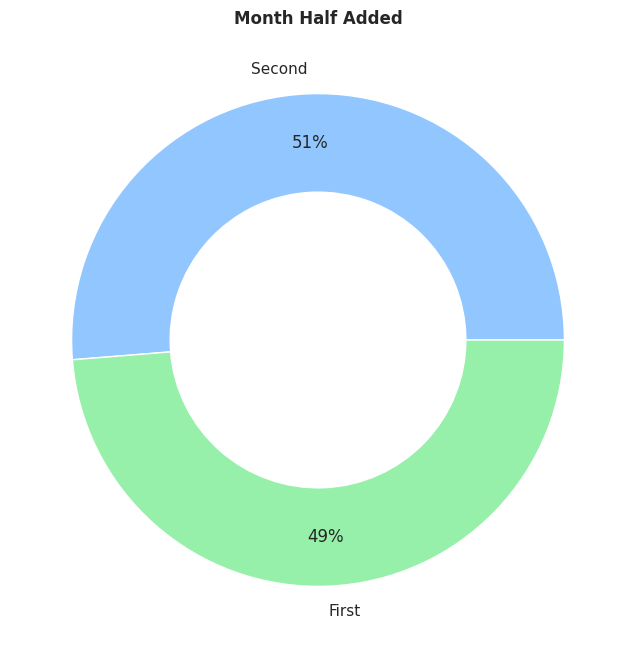

In [32]:
# Displaying the month half the movie was added based on the algorithm above:
wl['Month Half Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half Added', fontweight = 'bold')
plt.show()

# **The algorithm below was a bit more complicated to be implemented, as the movie genres are listed in the column separated by comma, so they had to be splitted and counted, and then their proportions were counted and plotted.**

In [33]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Splitting the genres by comma and removing leading spaces:
wl['Genres'] = wl['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
wl = wl.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = wl.index, columns = wl['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [34]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action         619   124
Adventure      627   116
Animation      725    18
Biography      671    72
Comedy         496   247
Crime          596   147
Documentary    737     6
Drama          212   531
Family         666    77
Fantasy        684    59
Film-Noir      739     4
History        700    43
Horror         720    23
Music          715    28
Musical        719    24
Mystery        690    53
Romance        560   183
Sci-Fi         687    56
Sport          696    47
Thriller       592   151
War            691    52
Western        716    27


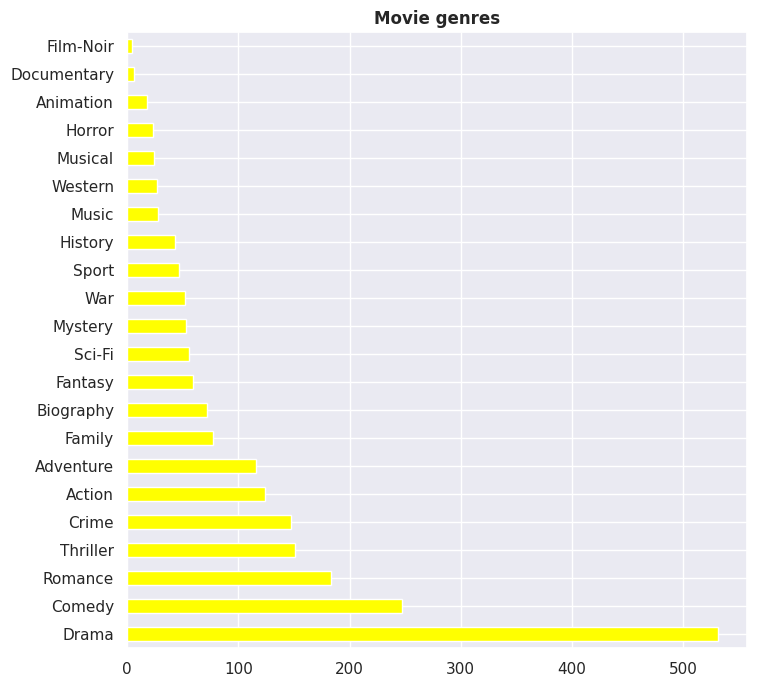

In [35]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [36]:
wl = wl[wl['Directors'].apply(lambda x: isinstance(x, str))]

# Splitting the directors by comma and removing leading spaces:
wl['Directors'] = wl['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
wl = wl.explode('Directors')

# Counting Matrix using crosstab method:
directors_counts = pd.crosstab(index = wl.index, columns = wl['Directors'], margins = False).to_dict('index')
directors_counts = pd.DataFrame(directors_counts)

# Counting the number of 0s and 1s in each row:
final_directors_counts = (directors_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-36-96bf50eac1cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wl['Directors'] = wl['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [37]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
final_directors_counts = pd.DataFrame(final_directors_counts.tolist(), index = final_directors_counts.index, columns = ['False', 'True'])
print(final_directors_counts)

                     False  True
Adrian Lyne            737     0
Alan Parker            738     0
Alan Shapiro           738     0
Albert Band            738     0
Albert Brooks          738     0
...                    ...   ...
Wolfgang Petersen      738     0
Wolfgang Reitherman    736     0
Woody Allen            738     0
Yves Simoneau          738     0
Zoltan Korda           738     1

[578 rows x 2 columns]


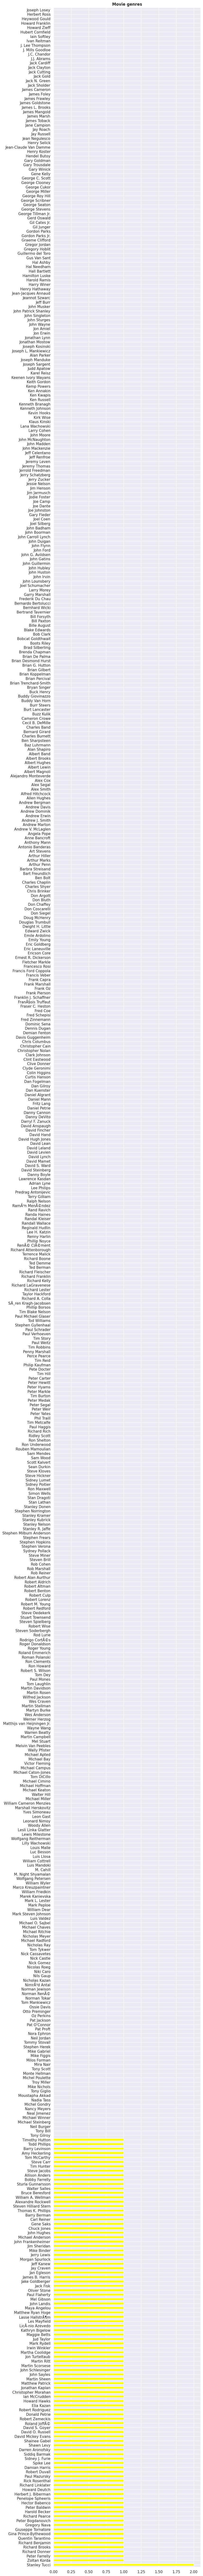

In [39]:
# Displaying the proportions of the directors present in the dataset:
final_directors_counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 140))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()